In [1]:
import sys

sys.path.append(".../src")

In [3]:
from src.downsampled import downsample_grey, downsample_universal
from src.interpolation import conv_interpolate,color_image_intepolate, grey_image_interpolate
from src.kernels import sample_hold_kernel, nearest_neighbour_kernel, linear_kernel
from src.mse import calculate_mse

import numpy as np
from numpy.typing import NDArray
from skimage import io, transform, color
from matplotlib import pyplot as plt
from scipy.ndimage import convolve
from sklearn.metrics import mean_squared_error as mse


(-0.5, 999.5, 599.5, -0.5)

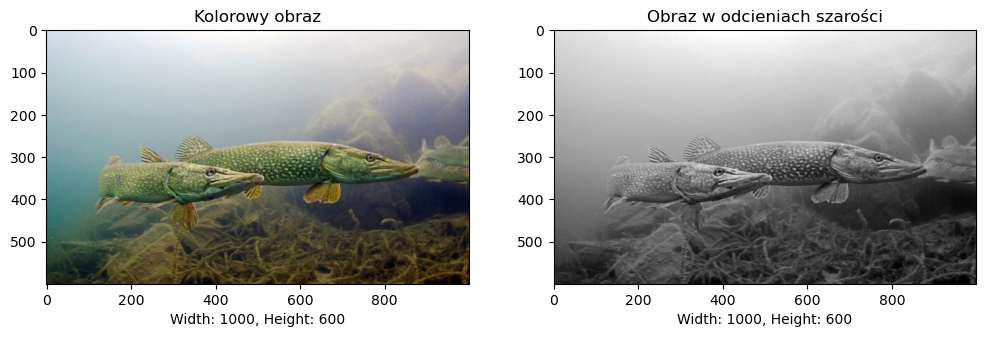

In [4]:
color_img=io.imread('szczupak.jpg')
color_img=transform.resize(color_img, output_shape=(600,1000,3))

grey_img = color.rgb2gray(color_img)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(color_img)
plt.title("Kolorowy obraz")
plt.xlabel(f"Width: {color_img.shape[1]}, Height: {color_img.shape[0]}")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(grey_img, cmap='gray')
plt.title("Obraz w odcieniach szarości")
plt.xlabel(f"Width: {grey_img.shape[1]}, Height: {grey_img.shape[0]}")
plt.axis('on')

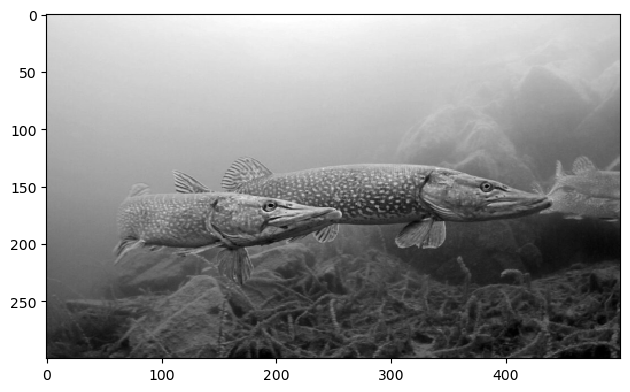

In [5]:
downsampled_grey_img = downsample_grey(grey_img, kernel_size=2)
img=io.imshow(downsampled_grey_img)


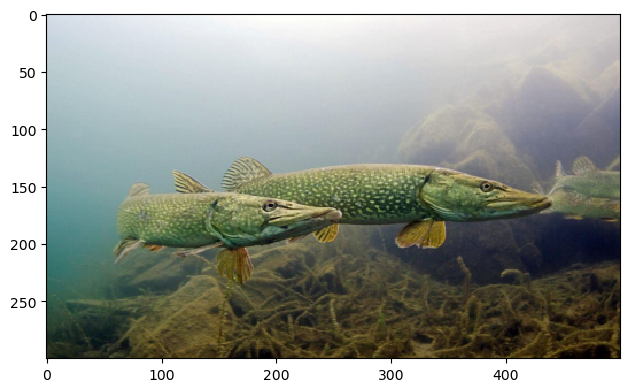

In [6]:
downsampled_color_img = downsample_universal(color_img, kernel_size=2)
img=io.imshow(downsampled_color_img)

In [69]:
grey_img.shape

(600, 1000)

In [70]:
grey_img_upsampled_sample_hold_kernel = grey_image_interpolate(grey_img, kernel=sample_hold_kernel, ratio=2)
grey_img_upsampled_sample_hold_kernel.shape

(1200, 2000)

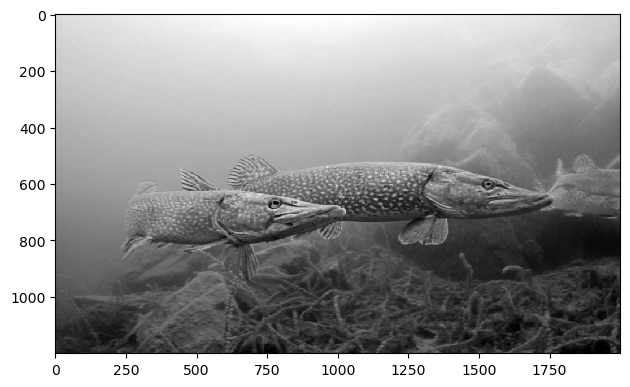

In [71]:
img=io.imshow(grey_img_upsampled_sample_hold_kernel)

In [72]:
grey_img_upsampled_nearest_neighbour_kernel = grey_image_interpolate(grey_img, kernel=nearest_neighbour_kernel, ratio=2)
grey_img_upsampled_nearest_neighbour_kernel.shape

(1200, 2000)

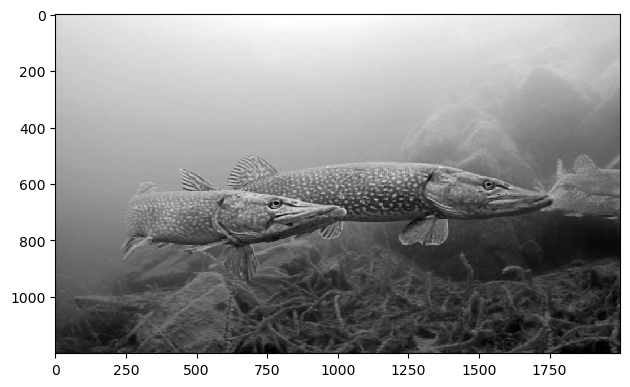

In [73]:
img=io.imshow(grey_img_upsampled_nearest_neighbour_kernel)

In [74]:
grey_img_upsampled_linear_kernel = grey_image_interpolate(grey_img, kernel=linear_kernel, ratio=2)
grey_img_upsampled_linear_kernel.shape

(1200, 2000)

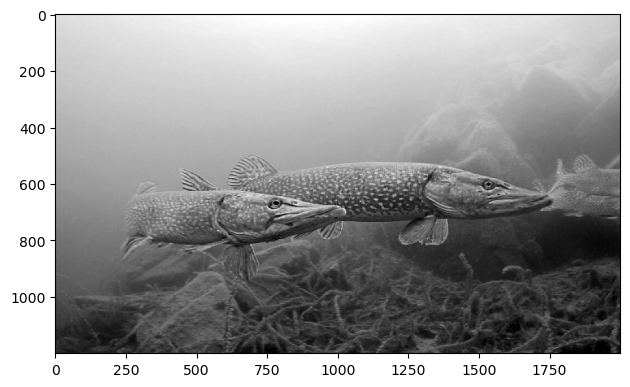

In [75]:
img=io.imshow(grey_img_upsampled_linear_kernel)

In [90]:
mse1=calculate_mse(grey_img_upsampled_linear_kernel, grey_img_upsampled_nearest_neighbour_kernel)
mse2=calculate_mse(grey_img_upsampled_linear_kernel, grey_img_upsampled_sample_hold_kernel)
mse3=calculate_mse(grey_img_upsampled_nearest_neighbour_kernel,grey_img_upsampled_sample_hold_kernel)

print(f"MSE beetween linear and nearest neighbour interpolation: {mse1:.4}")
print(f"MSE beetween linear and nearest sample hold interpolation: {mse2:.4}")
print(f"MSE beetween nearest neighbour and sample hold interpolation: {mse3:.4}")


MSE beetween linear and nearest neighbour interpolation: 0.000164
MSE beetween linear and nearest sample hold interpolation: 0.0001639
MSE beetween nearest neighbour and sample hold interpolation: 0.0006455


In [77]:
color_img.shape

(600, 1000, 3)

In [78]:
color_img_upsampled_sample_hold_kernel = color_image_intepolate(color_img, kernel=sample_hold_kernel, ratio=2)
color_img_upsampled_sample_hold_kernel.shape

(1200, 2000, 3)

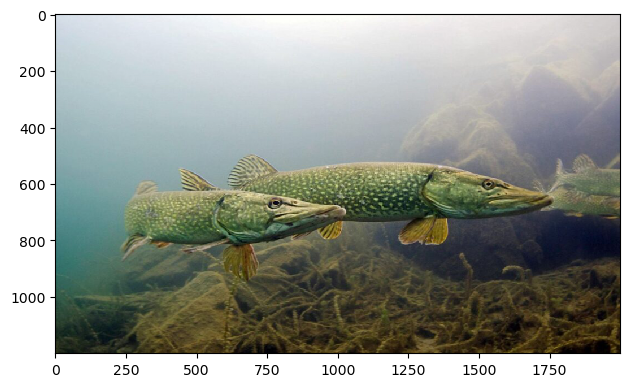

In [79]:
img=io.imshow(color_img_upsampled_sample_hold_kernel)

In [80]:
color_img_upsampled_nearest_neighbour_kernel = color_image_intepolate(color_img, kernel=nearest_neighbour_kernel, ratio=2)
color_img_upsampled_nearest_neighbour_kernel.shape

(1200, 2000, 3)

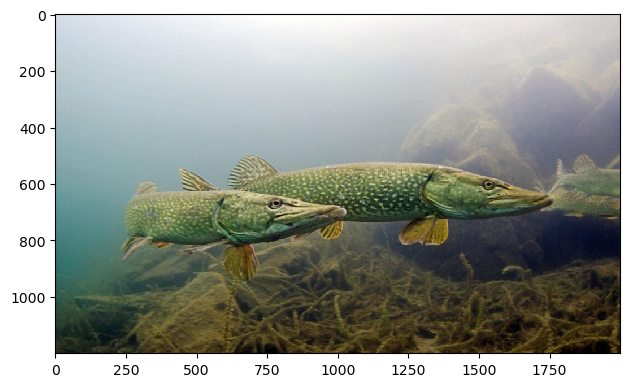

In [81]:
img=io.imshow(color_img_upsampled_nearest_neighbour_kernel)

In [82]:
color_img_upsampled_linear_kernel = color_image_intepolate(color_img, kernel=linear_kernel, ratio=2)
color_img_upsampled_linear_kernel.shape

(1200, 2000, 3)

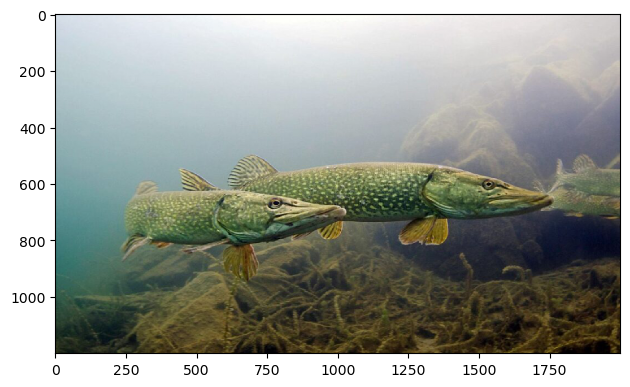

In [83]:
img=io.imshow(color_img_upsampled_linear_kernel)

In [84]:
mse1=calculate_mse(color_img_upsampled_linear_kernel, color_img_upsampled_nearest_neighbour_kernel)
mse2=calculate_mse(color_img_upsampled_linear_kernel, color_img_upsampled_sample_hold_kernel)
mse3=calculate_mse(color_img_upsampled_nearest_neighbour_kernel, color_img_upsampled_sample_hold_kernel)

print(f"MSE beetween linear and nearest neighbour interpolation: {mse1:.4}")
print(f"MSE beetween linear and nearest sample hold interpolation: {mse2:.4}")
print(f"MSE beetween nearest neighbour and sample hold interpolation: {mse3:.4}")


MSE beetween linear and nearest neighbour interpolation: 0.0001618
MSE beetween linear and nearest sample hold interpolation: 0.0001618
MSE beetween nearest neighbour and sample hold interpolation: 0.0006368
